<a href="https://colab.research.google.com/github/Nawapon19/NLP-Practice/blob/main/Text_Preprocessing_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Text Preprocessing**

In [35]:
# import necessary libraries
import nltk
import string
import re
import inflect

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk

nltk.download('stopwords')
nltk.download('tagsets')
nltk.download('words')
nltk.download('maxent_ne_chunker')

# install and import TextBlob
!pip install -U textblob
!python -m textblob.download_corpora
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


**Text Lowercase:**
lowercase the text to reduce the size of the vocabulary of text data.

In [36]:
def text_lowercase(text):
  return text.lower()

input_str = "Hey, did you know that the summer break is coming? Amazing right !! It's only 5 more days !!"
text_lowercase(input_str)

"hey, did you know that the summer break is coming? amazing right !! it's only 5 more days !!"

**Remove numbers:**
either to remove numbers or convert the numbers into their textual representations.

In [37]:
# remove numbers using regular expressions
def remove_numbers(text):
  # re.sub(): replace digit character with ''
  # \d: matches any Unicode decimal digit, includes [0-9], and also many other digit characters
  result = re.sub(r'\d+', '', text)
  return result

input_str = "There are 3 balls in this bag, and 12 in the other one."
remove_numbers(input_str)

'There are  balls in this bag, and  in the other one.'

In [38]:
# convert the numbers into words using inflect library
p = inflect.engine()

# define a function to convert numbers into words
def convert_number(text):
  # split string into list of words
  temp_str = text.split()
  # create empty list for new string
  new_string = []

  for word in temp_str:
    # if word is digit, convert the digit to word number and append to new string
    if word.isdigit():
      temp = p.number_to_words(word)
      new_string.append(temp)

    else:
      new_string.append(word)

  # join words in new string list to form a new string
  temp_str = ' '.join(new_string)

  return temp_str

input_str = 'There are 3 balls in this bag, and 12 in the other one.'
convert_number(input_str)

'There are three balls in this bag, and twelve in the other one.'

**Remove punctuation:**
to remove different forms of the same word. If not, then been. been, been! will be treated separately.

In [39]:
# define a function for removing punctuations using str.translate and str.maketrans for mapping
def remove_punctuation(text):
  # create a mapping for translation replace punctuation with '' and remove ''
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

input_str = "Hey, did you know that the summer break is coming? Amazing right !! It's only 5 more days !!"
remove_punctuation(input_str)

'Hey did you know that the summer break is coming Amazing right  Its only 5 more days '

**Remove whitespaces:**
use the join and split function to remove all the white spaces in a string.

In [40]:
# define a function for removing whitespace from text
def remove_whitespace(text):
  return ' '.join(text.split())

input_str = "   we don't need   the given questions"
remove_whitespace(input_str)

"we don't need the given questions"

**Tokenization:**
Token – Each “entity” that is a part of whatever was split up based on rules. For examples, each word is a token when a sentence is “tokenized” into words. Each sentence can also be a token, if you tokenized the sentences out of a paragraph.

In [41]:
# tokenization using nltk sentence and word tokenization
text = "Natural language processing (NLP) is a field " + \
       "of computer science, artificial intelligence " + \
       "and computational linguistics concerned with " + \
       "the interactions between computers and human " + \
       "(natural) languages, and, in particular, " + \
       "concerned with programming computers to " + \
       "fruitfully process large natural language " + \
       "corpora. Challenges in natural language " + \
       "processing frequently involve natural " + \
       "language understanding, natural language" + \
       "generation frequently from formal, machine" + \
       "-readable logical forms), connecting language " + \
       "and machine perception, managing human-" + \
       "computer dialog systems, or some combination " + \
       "thereof."

print(sent_tokenize(text))
print(word_tokenize(text))

['Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora.', 'Challenges in natural language processing frequently involve natural language understanding, natural languagegeneration frequently from formal, machine-readable logical forms), connecting language and machine perception, managing human-computer dialog systems, or some combination thereof.']
['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'computer', 'science', ',', 'artificial', 'intelligence', 'and', 'computational', 'linguistics', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'and', ',', 'in', 'particular', ',', 'concerned', 'with', 'programming', 'computers', 'to'

In [42]:
# tokenization using TextBlob
text = ("Natural language processing (NLP) is a field " +
       "of computer science, artificial intelligence " +
       "and computational linguistics concerned with " +
       "the interactions between computers and human " +
       "(natural) languages, and, in particular, " +
       "concerned with programming computers to " +
       "fruitfully process large natural language " +
       "corpora. Challenges in natural language " +
       "processing frequently involve natural " +
       "language understanding, natural language" +
       "generation frequently from formal, machine" +
       "-readable logical forms), connecting language " +
       "and machine perception, managing human-" +
       "computer dialog systems, or some combination " +
       "thereof.")

# create a TextBlob object
blob_object = TextBlob(text)

# tokenize paragraph into sentences
print("Sentence Tokenize: ", blob_object.sentences)

# tokenize paragraph into words
print("\nWord Tokenize: ", blob_object.words)

Sentence Tokenize:  [Sentence("Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora."), Sentence("Challenges in natural language processing frequently involve natural language understanding, natural languagegeneration frequently from formal, machine-readable logical forms), connecting language and machine perception, managing human-computer dialog systems, or some combination thereof.")]

Word Tokenize:  ['Natural', 'language', 'processing', 'NLP', 'is', 'a', 'field', 'of', 'computer', 'science', 'artificial', 'intelligence', 'and', 'computational', 'linguistics', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'natural', 'languages', 'and', 'in', 'particular', 'concerned', 'with', 'programming', 

**Remove default stopwords:** Stopwords are words that do not contribute to the meaning of a sentence. Hence, they can safely be removed without causing any change in the meaning of the sentence.

In [43]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
# define a function for removing stopwords
def remove_stopwords(text):
  # load English stopwords from stopwords module to a set
  stop_words = set(stopwords.words('english'))
  # tokenize text
  word_tokens = word_tokenize(text)

  filtered_text = [word for word in word_tokens if word not in stop_words]

  return filtered_text

example_text = "This is a sample sentence and we are going to remove the stopwords from this."
remove_stopwords(example_text)


['This', 'sample', 'sentence', 'going', 'remove', 'stopwords', '.']

**Stemming:**
Stemming is the process of getting the root form of a word. Stem or root is the part to which inflectional affixes (-ed, -ize, -de, -s, etc.) are added. The stem of a word is created by removing the prefix or suffix of a word. So, stemming a word may not result in actual words.

There are mainly three algorithms for stemming. These are the Porter Stemmer, the Snowball Stemmer and the Lancaster Stemmer. Porter Stemmer is the most common among them.

In [45]:
# create stemmer object using PorterStemmer
stemmer = PorterStemmer()

# define a function for stemming
def stem_words(text):
  word_tokens = word_tokenize(text)
  stems = [stemmer.stem(word) for word in word_tokens]

  return stems

text = 'data science uses scientific methods algorithms and many types of processes'
stem_words(text)

['data',
 'scienc',
 'use',
 'scientif',
 'method',
 'algorithm',
 'and',
 'mani',
 'type',
 'of',
 'process']

**Lemmatization:**
Like stemming, lemmatization also converts a word to its root form. The only difference is that lemmatization ensures that the root word belongs to the language.

In NLTK, the WordNetLemmatizer is used to get the lemmas of words. A context for the lemmatization is needed. So, add the part-of-speech as a parameter.

In [46]:
# create lemmatizer object using WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# define a function for lemmatization
def lemmatize_word(text):
  word_tokens = word_tokenize(text)
  # provide a context: part of speech as verb
  lemmas = [lemmatizer.lemmatize(word, pos = 'v') for word in word_tokens]

  return lemmas

text = 'data science uses scientific methods algorithms and many types of processes'
lemmatize_word(text)

['data',
 'science',
 'use',
 'scientific',
 'methods',
 'algorithms',
 'and',
 'many',
 'type',
 'of',
 'process']

**Part of Speech Tagging:**
The part of speech explains how a word is used in a sentence. In a sentence, a word can have different contexts and semantic meanings. The basic natural language processing models like bag-of-words fail to identify these relations between words.

In [47]:
# define a function for pos tagging
def pos_tagging(text):
  word_tokens = word_tokenize(text)
  return pos_tag(word_tokens)

text = "You just gave me a scare"
pos_tagging(text)

[('You', 'PRP'),
 ('just', 'RB'),
 ('gave', 'VBD'),
 ('me', 'PRP'),
 ('a', 'DT'),
 ('scare', 'NN')]

In [48]:
# get the details of all the part of speech tags using the Penn Treebank tagset
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


**Chunking:**
Chunking is the process of extracting phrases from unstructured text and more structure to it. It is also known as shallow parsing. It is done on top of Part of Speech tagging. It groups word into “chunks”, mainly of noun phrases. Chunking is done using regular expressions.

In [49]:
# define a chunking function with text and regular expression representing grammar as parameter
def chunking(text, grammar):
  word_tokens = word_tokenize(text)

  # label words with pos
  word_pos = pos_tag(word_tokens)

  # create a chunk parser using grammar
  chunkParser = nltk.RegexpParser(grammar)

  # test it on the list of word tokens with tagged pos
  tree = chunkParser.parse(word_pos)

  for subtree in tree.subtrees():
    print(subtree)

  #tree.draw()

sentence = 'the little yellow bird is flying in the sky'
grammar = "NP: {<DT>?<JJ>*<NN>}"
# NP (Noun Phrase) chunk should be formed whenever the chunker finds an optional determiner (DT)
# followed by any number of adjectives (JJ) and then a noun (NN)

chunking(sentence, grammar)

(S
  (NP the/DT little/JJ yellow/JJ bird/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ yellow/JJ bird/NN)
(NP the/DT sky/NN)


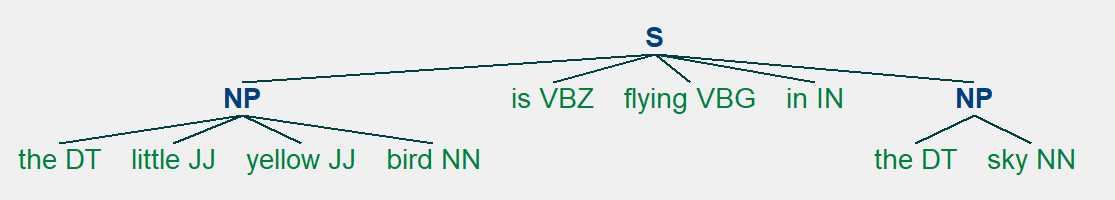

**Named Entity Recognition:**
Named Entity Recognition is used to extract information from unstructured text. It is used to classify entities present in a text into categories like a person, organization, event, places, etc. It gives us detailed knowledge about the text and the relationships between the different entities.

In [50]:
# define a function for named entity recognition
def named_entity_recognition(text):
  word_tokens = word_tokenize(text)

  # pos tagging
  word_pos = pos_tag(word_tokens)

  # tree of word entities
  print(ne_chunk(word_pos))

text = "Bill works for GeeksforGeeks so he went to Delhi for a meetup."
named_entity_recognition(text)

(S
  (PERSON Bill/NNP)
  works/VBZ
  for/IN
  (ORGANIZATION GeeksforGeeks/NNP)
  so/RB
  he/PRP
  went/VBD
  to/TO
  (GPE Delhi/NNP)
  for/IN
  a/DT
  meetup/NN
  ./.)
